# Classifying Vaccine Misinformation using RNN

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pwd
import os
os.chdir('/content/drive/MyDrive/Social Media Analytics')
!pwd

/content
/content/drive/MyDrive/Social Media Analytics


In [42]:
# Read in data and split into training and test set
# NOTE: we are NOT cleaning the data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

messages = pd.read_csv('information1.csv', encoding='latin-1')





In [43]:
text = messages['text']

# Preprocessing Text data by removing punctuation, stopwords,stemming and tokenization

In [44]:
import re
import nltk

import string
exclude = set(string.punctuation)

# We need this dataset in order to use the tokenizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Also download the list of stopwords to filter out
nltk.download('stopwords')
from nltk.corpus import stopwords

sws = set(stopwords.words('english'))
sws.add('rt') # Tweet specific stop-words
sws.add("…")

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def process_text(text):
    # Make all the strings lowercase and remove non alphabetic characters (punctuations)
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    
    # Tokenize the text; this is, separate every sentence into a list of words
    # Since the text is already split into sentences you don't have to call sent_tokenize
    tokenized_text = word_tokenize(text)
    
    #tokenized_text = [word_tokenize(text) for word in text if word not in exclude]
                    
    
    # Remove the stopwords and stem each word to its root
    clean_text = [
        stemmer.stem(word) for word in tokenized_text
        if word not in sws
    ]

    # Remember, this final output is a list of words
    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
clean_text = [process_text(text) for text in text]

In [48]:
clean_text[2]

['nobodi',
 'talk',
 'efficaci',
 'covidvaccin',
 'emerg',
 'covid',
 'variant',
 'sure',
 'inocul',
 'vaccin',
 'littl',
 'protect',
 'variant',
 'use',
 'efficaci',
 'amp',
 'updat',
 'vaccin',
 'due',
 'releas',
 'normanswan']

In [49]:
messages['clean_text'] = clean_text

In [50]:
messages.head()

,text,labels,clean_text
0,RT @pranavmahajan: This is important regarding #CovidVaccines. Pls read &amp; share.\n\nCredit: @IndiaToday https://t.co/UNkzZRDmfl,1.0,"[pranavmahajan, import, regard, covidvaccin, pl, read, amp, share, credit, indiatoday, http, co, unkzzrdmfl]"
1,#CovidVaccines between #GenZ and #Millennials are the next #Challenge for ðºð¸ and ð¬ð§. ðââï¸\nhttps://t.co/eHG5jKIrWS,0.0,"[covidvaccin, genz, millenni, next, challeng, http, co, ehg, jkirw]"
2,Why is nobody talking about efficacy of #COVIDVaccines against emerging #COVID19 variants? Surely if we're being inoculated with a vaccine that has little protection against variants then why not use the most efficacious &amp; when are updated vaccines due to be released? @normanswan,0.0,"[nobodi, talk, efficaci, covidvaccin, emerg, covid, variant, sure, inocul, vaccin, littl, protect, variant, use, efficaci, amp, updat, vaccin, due, releas, normanswan]"
3,"@EvanLSolomon @fordnation All because #TrudeauFailedCanada and did not purchase #COVIDVaccines soon enough. we should of been giving the second shot by now but here we are scratching, borrowing and pleading with other countries to try to get enough vaccine just for people's first jab. #trudeauð©",1.0,"[evanlsolomon, fordnat, trudeaufailedcanada, purchas, covidvaccin, soon, enough, give, second, shot, scratch, borrow, plead, countri, tri, get, enough, vaccin, peopl, first, jab, trudeau]"
4,Who are you getting vaccinated for? #GetVaccinated #getthevax #COVIDVaccines https://t.co/xZNjMhi27M,1.0,"[get, vaccin, getvaccin, getthevax, covidvaccin, http, co, xznjmhi]"


In [51]:
X = messages['clean_text'][0:300]

In [52]:
y = messages['labels'][0:300]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Prep Data For Modeling

In [8]:
# Install keras
!pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.7/dist-packages (2.4.3)


In [54]:
# Import the tools we will need from keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [55]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [56]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [57]:
# What do these sequences look like?
X_train_seq[0]

[52,
 8,
 1,
 324,
 325,
 22,
 59,
 608,
 609,
 610,
 60,
 611,
 22,
 59,
 151,
 77,
 4,
 326,
 78,
 1]

In [58]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [59]:
# What do these padded sequences look like?
X_train_seq_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  52,   8,   1, 324, 325,  22,  59, 608, 609,
       610,  60, 611,  22,  59, 151,  77,   4, 326,  78,   1], dtype=int32)

### Build Model

In [60]:
# Import the tools needed from keras and define functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [61]:
# Construct a simple RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          56512     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 65,921
Trainable params: 65,921
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [63]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=15,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/15
8/8 [==============================] - 3s 113ms/step - loss: 0.6898 - accuracy: 0.5676 - precision_m: 0.9456 - recall_m: 0.5973 - val_loss: 0.6592 - val_accuracy: 0.9667 - val_precision_m: 0.9688 - val_recall_m: 1.0000
Epoch 2/15
8/8 [==============================] - 0s 30ms/step - loss: 0.6501 - accuracy: 0.9389 - precision_m: 0.9398 - recall_m: 1.0000 - val_loss: 0.5784 - val_accuracy: 0.9667 - val_precision_m: 0.9688 - val_recall_m: 1.0000
Epoch 3/15
8/8 [==============================] - 0s 31ms/step - loss: 0.5561 - accuracy: 0.9253 - precision_m: 0.9262 - recall_m: 1.0000 - val_loss: 0.3327 - val_accuracy: 0.9667 - val_precision_m: 0.9688 - val_recall_m: 1.0000
Epoch 4/15
8/8 [==============================] - 0s 32ms/step - loss: 0.3253 - accuracy: 0.9252 - precision_m: 0.9226 - recall_m: 1.0000 - val_loss: 0.1665 - val_accuracy: 0.9667 - val_precision_m: 0.9688 - val_recall_m: 1.0000
Epoch 5/15
8/8 [==============================] - 0s 31ms/step - loss: 0.2228 - acc

No handles with labels found to put in legend.


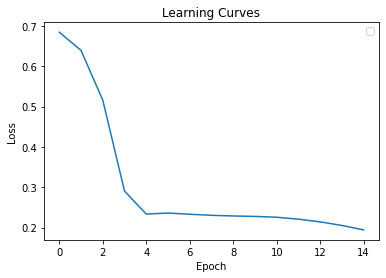

In [65]:
from matplotlib import pyplot
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')

pyplot.plot(history.history['loss'])
#pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()